# Coding Homework - Fall 2023
* This is one of two coding assignments that I will manually grade
* It is broken into a few sections
* Please note that I will be grading these manually so it may take some time to get them all graded and due to the number of students, my feedback may be high level
* Please remember to include some exporation and cleaning of your data
* Include visualization to explain your model
* We have discussed everything you need for this notebook and demo notebooks have code examples
* Don't forgot to save a copy of the notebook before you make changes


# Student Names
* Bibin Sibi
* <student 2>
* If you work in a group, make sure to join a group in Canvas
* *Working in a group is optional*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# add other common imports here

### Titanic (50 points)
* Use the data from https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
* Explore the data
* Create and test a model to predict if someone likely survived or not
* Provide relevant visualizations

In [2]:
url1 =  "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
#EXPLORE DATA
# I USED REGRESSION NOTEBOOK (FROM THE SHARED DRIVE) AS AN EXAMPLE ON HOW TO DO LOGISTIC REGRESSION
titanic_original = pd.read_csv(url1)
titanic = titanic_original.copy()
print(titanic_original.head())
print(titanic_original.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [4]:
usefulData = ["Pclass", "Sex", "Age", "SibSp", "Parch","Fare"] #could not include cabin
titanic_values = titanic[usefulData]
#process data to deal with the string "male" and "female"  and convert the cabin string to show only the letter of the cabin
#titanic_values["CabinLetter"] = titanic_values["Cabin"].str[0]
#titanic_values = pd.get_dummies(titanic_values, columns=["CabinLetter"], prefix="Cabin", drop_first=True)
titanic_values = pd.get_dummies(titanic_values, columns=["Sex"], drop_first=True)

#age is missing values so i set them to the average
titanic_values["Age"].fillna(titanic_values["Age"].mean(), inplace=True)

titanic_target = titanic["Survived"]

x_train, x_test, y_train, y_test = train_test_split(titanic_values, titanic_target, test_size= .25, random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [5]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [6]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(x_test)
probs_y=classifier.predict_proba(x_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)

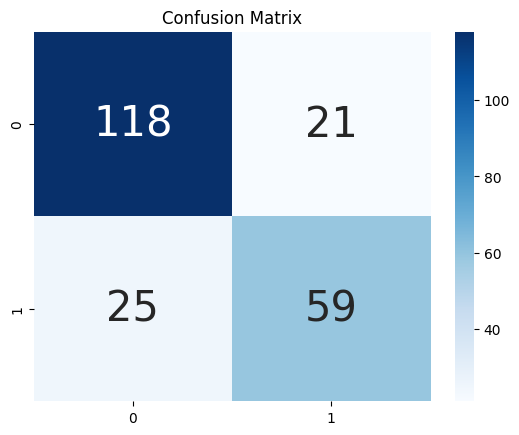

In [7]:
#plot confusion matrix as heatmap
import seaborn as sns
import pandas as pd
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [8]:
#Unfortunately, this does not make sense to me
#so i looked up better ways to display my logistic regression data
#and decided to find feature importance
importance = classifier.coef_[0]
dataFrame = pd.DataFrame({"Feature": titanic_values.columns, "Importance": importance})
dataFrame = dataFrame.sort_values(by="Importance", ascending=False)

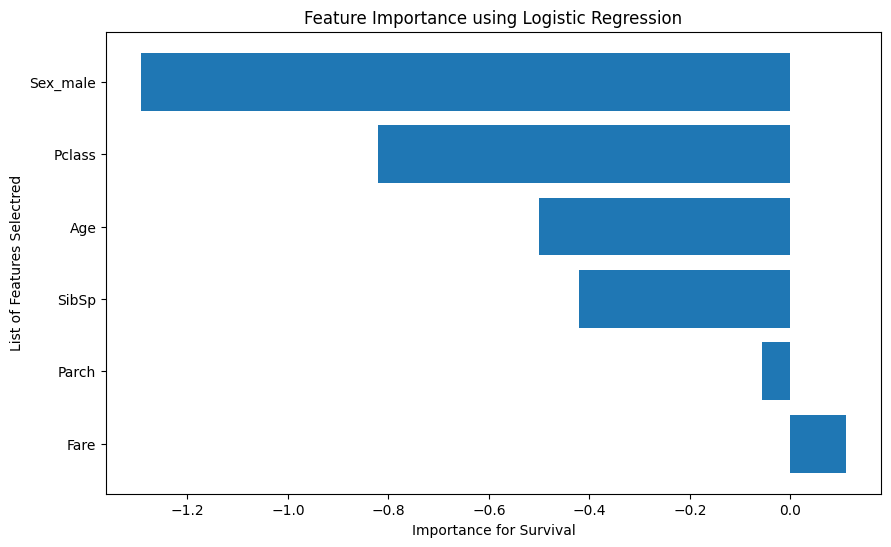

In [9]:
#plot using plt

plt.figure(figsize=(10, 6))
plt.barh(dataFrame["Feature"], dataFrame["Importance"])
plt.xlabel("Importance for Survival")
plt.ylabel("List of Features Selectred")
plt.title("Feature Importance using Logistic Regression")
plt.show()

ANALYSIS:


*   Because all the values on the feature importance chart is negative, each of those features have a negative impact on survival aboard the titanic
*   The feature importance of being a male aboard the titanic has the highest impact on survival rate, lowering it significantly with a feature value of -1.3
*   The feature importance of what passenger class (pclass) also has a significant impact of -0.9, with Pclass taking values from 1-3. The higher the value, aka 3 being 3rd class, the lower the chance of survival upon the titanic
* The feature importance of Age and number of siblings also has a negative feature importance of around -0.5 and -0.4 respectively, meaning that the more higher the age or the more siblings you have, the lower the chance of survival
* The feature importance of Parch, which is the number of parents or siblings aboard, does have a small negative feature value indicating that higher numbers mean a lower chance of survivability, but that isn't as strong as the other features
*Fare was a value I decided to add to the list later, and it seems to be the only value with a positive importance, which means the higher your fare price, the higher chance of survival you got



## California Housing (50 points)
* Load the California housing data using
    *   from sklearn.datasets import fetch_california_housing
* Explore the data
* Create a model to predict medium housing values
* Include information on how you evaluated your model
* Include relevant visualizatons

In [10]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
# Ref: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [11]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [12]:
print(housing.data.sample(5))

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
5481   3.1607      52.0  4.313679   1.113208       779.0  1.837264     33.99   
337    2.2500      46.0  4.320225   1.028090       693.0  3.893258     37.74   
15155  6.6012       6.0  7.465098   1.112157      4413.0  3.461176     32.99   
13018  2.7174      26.0  5.171429   1.020168      1603.0  2.694118     38.69   
7188   2.8167      45.0  3.978166   1.039301      1005.0  4.388646     34.04   

       Longitude  
5481     -118.45  
337      -122.17  
15155    -117.04  
13018    -121.20  
7188     -118.17  


In [13]:
print(housing.target.sample(10))

15304    2.66700
2209     0.68000
13395    1.74800
10085    2.64100
4735     4.74100
5643     3.51200
12804    0.70000
17289    5.00001
14445    2.90600
19622    0.75000
Name: MedHouseVal, dtype: float64


In [14]:
# Your code here
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [15]:
housingValues = housing.data
housingTarget = housing.target

In [16]:
#I will use Linear Regression
from sklearn.linear_model import LinearRegression
model_housing = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(housingValues, housingTarget, test_size=0.25, random_state=42)
model_housing.fit(X_train, y_train)
y_predicted = model_housing.predict(X_test)

#I don't know why i cant use this method from the notebook, x_np and y_np create errors
#x_np = housing.iloc[:, 0].data.reshape(-1, 1)  # values converts it into a numpy array
#y_np = housing.iloc[:, 1].data.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

coefficient = model_housing.coef_
intercept = model_housing.intercept_
print(coefficient)
print(intercept)

[ 4.47600069e-01  9.56752596e-03 -1.24755956e-01  7.94471254e-01
 -1.43902596e-06 -3.44307993e-03 -4.18555257e-01 -4.33405135e-01]
-37.02782758526926


In [17]:
#For housing, linear regression values are usually interpreted using Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)
print(mse)

0.5411287478470685


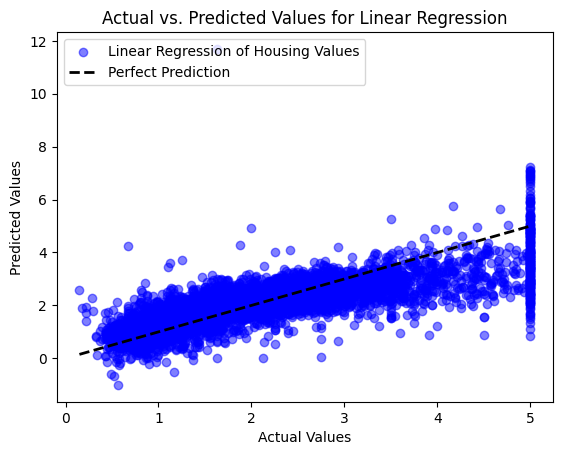

In [18]:
# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_predicted, alpha=0.5, c='b', label='Linear Regression of Housing Values')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Linear Regression")
plt.legend(loc='upper left')

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.legend(loc='upper left')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


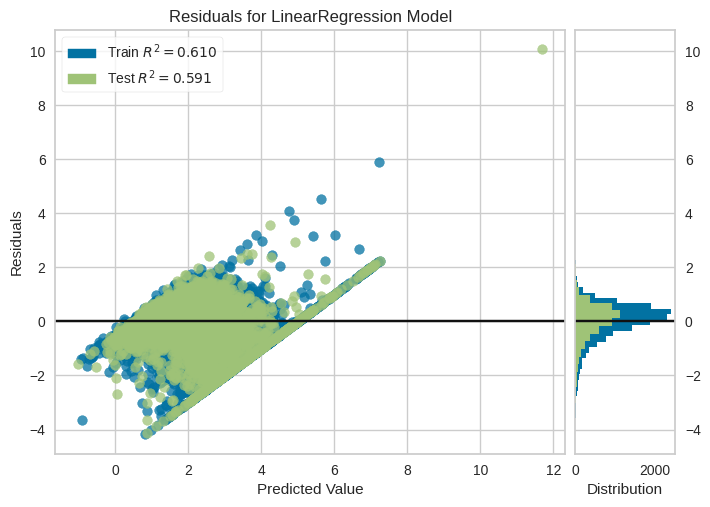

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [19]:
#I got this code from the REGRESSION DEMO NOTEBOOK
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model_housing)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

ANALYSYS:


*   The MSE (Mean Squared Error) of .541 is a value that represents how well the model predicts the medium house value, with 1 being the worst and 0 meaning perfection
* MSE of .541 is around the middle which is an acceptable value, meaning we can accept our linear regression model
* The residuals show the difference between the expected and precited values. Our residual plot shows that as our predicted value goes up, our predicted value goes from being too high (negative residual) to too low (positive residual) with a distribution centered around (2,0), meaning that the predicted values that are around 2 are the most accurate



# Wine Quality (50 points)
* Use an unsupervised method to group wines together
* Explore your data
* Even though this is a labeled training set, do not look at the target variable
* Use a technique to determine how many groups there are in your data
* Analyze your results and discuss metrics you used to analyze your results
* Overlay the actual results onto the groups and create a comparison
* Use visualization to help explain your model

In [20]:
from sklearn import datasets
from sklearn.cluster import KMeans
wine = datasets.load_wine()
data = wine.data
target = wine.target
feature_names = wine.feature_names

In [21]:
dfWine = pd.DataFrame(data, columns=feature_names)
print(dfWine.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

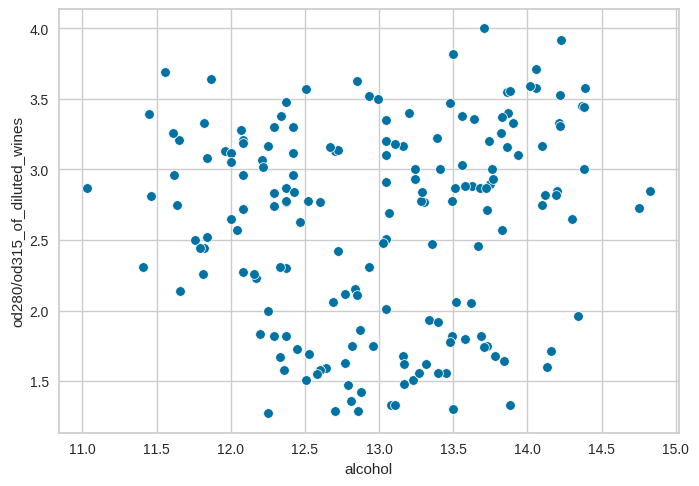

In [22]:
# sns.pairplot(dfWine)
#I used SNS pair plot and found that the relation between alchohol and od280/od315_of_diluted_wines produced the graph
#with the most distinguishable clusters with 3 clusters visible
sns.scatterplot(x=dfWine['alcohol'], y=dfWine['od280/od315_of_diluted_wines']);

In [23]:
#FROM THE GRAPH I CHOSE ABOVE, YOU CAN CLEARLY SEE THERE ARE 3 DIFFERENT CLUSTERS
#So I will use a guessed target of 3 and use K means clustering to analyze the data

from sklearn.decomposition import PCA
k = 3
X2 = data.copy()
pca = PCA(k)
pca.fit(X2)
X2 = pca.transform(X2)
df2 = pd.DataFrame(X2)
df2.columns = ["group1","group2","group3"]
df2["Wine Groups"] = k
print(df2.describe())
print(df2.head())

           group1        group2        group3  Wine Groups
count  178.000000  1.780000e+02  1.780000e+02        178.0
mean     0.000000  2.395088e-16  6.386901e-16          3.0
std    314.963156  1.313527e+01  3.072151e+00          0.0
min   -469.059350 -2.750404e+01 -9.005076e+00          3.0
25%   -246.140030 -8.330383e+00 -1.852032e+00          3.0
50%    -73.525398 -3.269233e+00  1.496622e-02          3.0
75%    238.565439  5.449197e+00  2.152859e+00          3.0
max    933.118387  5.879376e+01  9.947131e+00          3.0
       group1     group2    group3  Wine Groups
0  318.562979  21.492131  3.130735            3
1  303.097420  -5.364718  6.822835            3
2  438.061133  -6.537309 -1.113223            3
3  733.240139   0.192729 -0.917257            3
4  -11.571428  18.489995 -0.554422            3


In [24]:
#I am not sure why this doesn't display the 3D graphs for me
#I used the code from the k-means demo notebook

import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 2,2], elev=48, azim=134)
for name, label in [('Group1', 0), ('Group2', 1), ('Group3', 2)]:
    ax.text3D(X2[k == label, 0].mean(),
              X2[k == label, 1].mean() + 1.5,
              X2[k == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

#PLOT
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=target, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

[Text(-10.0, 0, ''),
 Text(-7.5, 0, ''),
 Text(-5.0, 0, ''),
 Text(-2.5, 0, ''),
 Text(0.0, 0, ''),
 Text(2.5, 0, ''),
 Text(5.0, 0, ''),
 Text(7.5, 0, ''),
 Text(10.0, 0, ''),
 Text(12.5, 0, '')]

<Figure size 400x300 with 0 Axes>

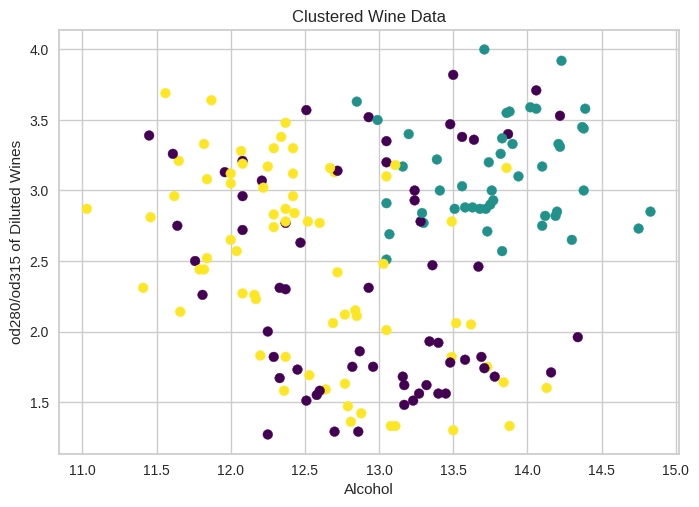

In [25]:
#USING PLT
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
dfWine['wines'] = kmeans.fit_predict(data)

plt.scatter(dfWine['alcohol'], dfWine['od280/od315_of_diluted_wines'], c=dfWine['wines'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('od280/od315 of Diluted Wines')
plt.title('Clustered Wine Data')
plt.show()

ANALYSIS: Using the sns scatterplot, I was able to see a pattern of plots with 3 clusters.

With this information, I used K-means clustering with 3 clustrers to try and create the 3D visual graph with Axis3D in the same way you did in the demo notebook (which if you try to run it, gives me some text rather than a graphic

Because of this, I was left with pyplot to help visualize the three clusters with distint colors.